In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import time
from scipy import spatial
import os
import random
import cv2
import glob
import pickle

import keras
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from keras import applications
import pandas as pd
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.applications.vgg19 import preprocess_input, decode_predictions
import numpy as np

import math

from skimage.measure import label, regionprops, regionprops_table
from skimage import morphology

from scipy.spatial import distance
# vgg19_model = applications.vgg19.VGG19(include_top=False, weights="imagenet", input_shape=(224,224,3))
MobileNetV2_model = applications.MobileNetV2(input_shape=(224, 224,3), include_top=False, weights='imagenet')

In [ ]:
def covnet_transform(covnet_model, raw_images):

    # Pass our training data through the network
    pred = covnet_model.predict(raw_images,verbose=0)

    # Flatten the array
    flat = pred.reshape(raw_images.shape[0], -1)
    
    return flat
def cluster_label_count(clusters, labels):
    
    count = {}
    
    # Get unique clusters and labels
    unique_clusters = list(set(clusters))
    unique_labels = list(set(labels))
    
    # Create counter for each cluster/label combination and set it to 0
    for cluster in unique_clusters:
        count[cluster] = {}
        
        for label in unique_labels:
            count[cluster][label] = 0
    
    # Let's count
    for i in range(len(clusters)):
        count[clusters[i]][labels[i]] +=1
    
    cluster_df = pd.DataFrame(count)
    
    return cluster_df
def create_fit_PCA(data, n_components=None):
    
    p = PCA(n_components=n_components, random_state=728)
    p.fit(data)
    
    return p
def load_images(*path):
  images = []
  address=[]
  for j in path:
    imagefile=glob.glob(j)
    address=address+imagefile
  
  for i in tqdm(address):
    # file_path = os.path.join(path, i)
    image = cv2.imread(i)
    image = cv2.resize(image, (224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
  return address, images
    # Define empty arrays where we will store our images and labels
    
    
    # labels = []
def normalise_images(images):
    # Convert to numpy arrays
    images = np.array(images, dtype=np.float32)
    # Normalise the images
    images /= 255
    return images
def create_train_kmeans(data, number_of_clusters=10):
    # n_jobs is set to -1 to use all available CPU cores. This makes a big difference on an 8-core CPU
    # especially when the data size gets much bigger. #perfMatters
    
    k = KMeans(n_clusters=number_of_clusters,  random_state=728)

    # Let's do some timings to see how long it takes to train.
    start = time.time()

    # Train it up
    k.fit(data)

    # Stop the timing 
    end = time.time()

    # And see how long that took
    print("Training took {} seconds".format(end-start))
    
    return k

PEELING

In [ ]:
add_mask=glob.glob("/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/*/*DEF*")
add_mask1=[v for v in add_mask if '637826116411705085_19_Metal_Bumpcorrosion' not in v and "637828697521060108_14_Metal_Poor_adherence_563" not in v and 
           '/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828716653503922_41_Probe_mark shift' not in v and '637829380796782770_34_Passivation_Hole' not in v
           and "/638010956791383400_21_PAD_Discoloration" not in v]


0.3641532063484192
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637825937074119367_30_Passivation_Penetrate_Particle_Removable/637848407842285267_RTEC_Regular_DEF.JPG


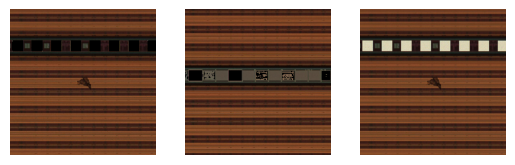

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637825937074119367_30_Passivation_Penetrate_Particle_Removable/637825950257081469_RTEC_Regular_DEF.JPG  is error
OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637825937074119367_30_Passivation_Penetrate_Particle_Removable/638010963244795587_RTEC_Regular_DEF.JPG  is error
OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637826081499851023_45_Probe defect_Cluster/637848426823198176_RTEC_Regular_DEF.JPG  is error
OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion

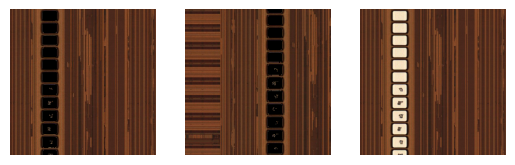

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828698416636723_11_Metal_Discoloration-290/638010937656434388_RTEC_Regular_DEF.JPG  is error


KeyboardInterrupt: ignored

In [ ]:

test=[]
def load_images(path):
  images = []
  address=path
  
  for i in (address):
    # file_path = os.path.join(path, i)
    image = cv2.imread(i)
    image = cv2.resize(image, (224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
  return address, images
co=0
for i in add_mask1[:]:
  co+=1
  try:
    lower = np.array([80,80,80])  # 轉換成 NumPy 陣列，範圍稍微變小 ( 55->30, 70->40, 252->200 )
    upper = np.array([255,255,255]) # 轉換成 NumPy 陣列，範圍稍微加大 ( 70->90, 80->100, 252->255 )


    REF=i.replace("DEF",'REF')
    DEF=i
    add,train=load_images([DEF,REF])
    img=cv2.cvtColor(train[0] ,cv2.COLOR_BGR2RGB)

    mask = cv2.inRange(img, lower, upper)             # 使用 inRange
    result_image = cv2.bitwise_and(img, img, mask = 255-mask )
    train[0]=result_image
    img=cv2.cvtColor(train[1] ,cv2.COLOR_BGR2RGB)
    # vectorized_img = img.reshape((-1,3))
    # vectorized_img= np.float32(vectorized_img)
    # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    # K = 7
    # attempts=10
    # ret,label,center=cv2.kmeans(vectorized_img,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    # center = np.uint8(center)
    # res = center[label.flatten()]
    # result_image = res.reshape((img.shape))
    # result_image = cv2.cvtColor(result_image ,cv2.COLOR_BGR2RGB)
    mask = cv2.inRange(img, lower, upper)             # 使用 inRange
    result_image = cv2.bitwise_and(img, img, mask = 255-mask )
    # plt.imshow(result_image)
    # plt.show()
    train[1]=result_image
    
    train=normalise_images(train)
    # vgg19_output = covnet_transform(vgg19_model, train)  
    vgg19_output = covnet_transform(MobileNetV2_model, train)  
    
    cos_sim = 1 - spatial.distance.cosine(vgg19_output[0], vgg19_output[1])
    if cos_sim<0.4:
      print(cos_sim)
      print(i)
      test.append(i)
      img1=cv2.imread(DEF)
      img2=cv2.imread(REF)
      fig = plt.figure()
      plt.subplot(131)
      plt.imshow(train[0][:,:,::-1])
      plt.axis("off")
      plt.subplot(132)
      plt.imshow(train[1][:,:,::-1])
      plt.axis("off")
      
      plt.subplot(133)
      plt.imshow(img1[:,:,::-1])
      plt.axis("off")
      plt.show()
  except Exception as e:
    print(e)
    print(i ,' is error')
    



OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828698416636723_11_Metal_Discoloration-290/638010937656434388_RTEC_Regular_DEF.JPG  is error
OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828704328514271_15_Metal_Bridging_517/638010940704327422_RTEC_Regular_DEF.JPG  is error
0.3835645318031311
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828710844581539_38_Passivation_Peeling/637828714845124942_RTEC_Regular_DEF.JPG


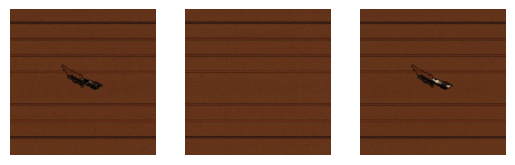

0.28836098313331604
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828710844581539_38_Passivation_Peeling/637828714850281622_RTEC_Regular_DEF.JPG


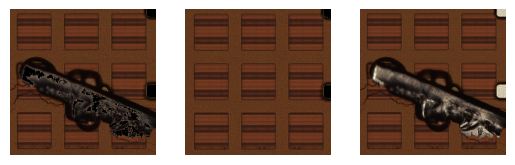

0.3969176113605499
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828710844581539_38_Passivation_Peeling/637828714853563021_RTEC_Regular_DEF.JPG


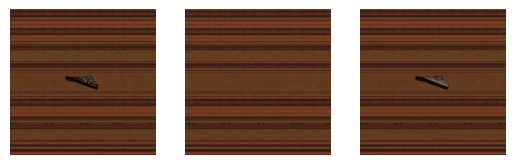

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828710844581539_38_Passivation_Peeling/637828714888410217_RTEC_Regular_DEF.JPG  is error
OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828710844581539_38_Passivation_Peeling/638010964171874117_RTEC_Regular_DEF.JPG  is error
0.388858824968338
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828710844581539_38_Passivation_Peeling/638010964084869354_RTEC_Regular_DEF.JPG


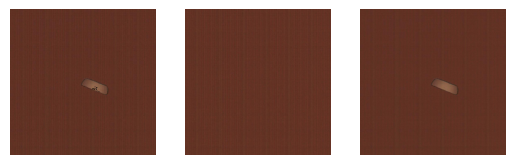

0.38082417845726013
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828710844581539_38_Passivation_Peeling/638010964093772319_RTEC_Regular_DEF.JPG


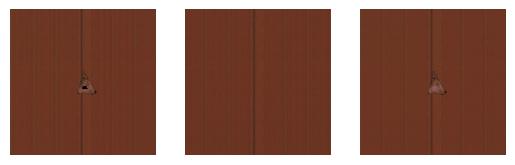

0.34664109349250793
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828710844581539_38_Passivation_Peeling/637828714858094883_RTEC_Regular_DEF.JPG


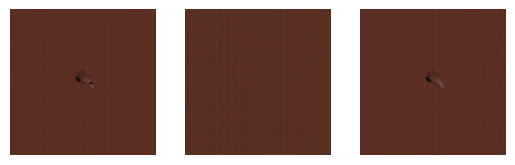

0.33559250831604004
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828710844581539_38_Passivation_Peeling/637828714862314010_RTEC_Regular_DEF.JPG


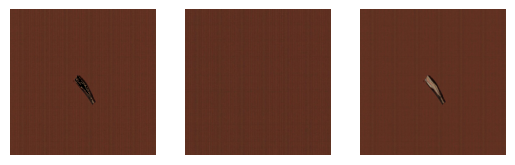

0.33378979563713074
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828710844581539_38_Passivation_Peeling/638010964303084300_RTEC_Regular_DEF.JPG


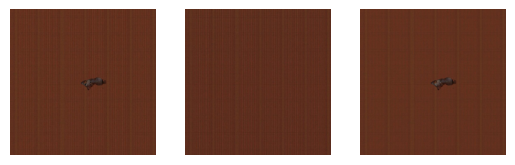

0.36239615082740784
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828710844581539_38_Passivation_Peeling/638010964303552764_RTEC_Regular_DEF.JPG


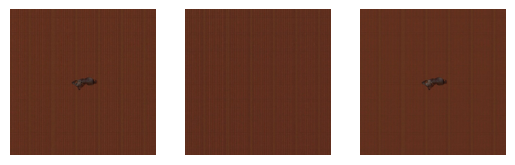

0.3870815336704254
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828710844581539_38_Passivation_Peeling/638010964071279749_RTEC_Regular_DEF.JPG


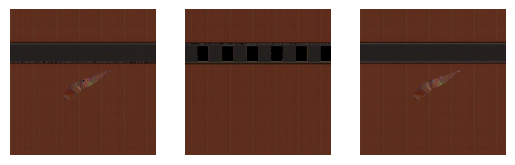

0.39753401279449463
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828710844581539_38_Passivation_Peeling/638010964147975185_RTEC_Regular_DEF.JPG


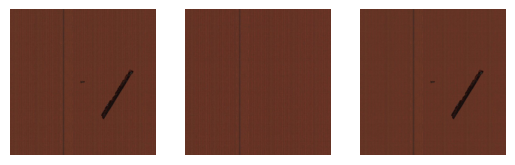

0.38828209042549133
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828710844581539_38_Passivation_Peeling/637828714862626554_RTEC_Regular_DEF.JPG


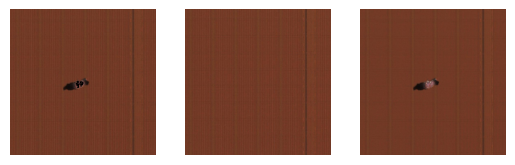

0.39585021138191223
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828710844581539_38_Passivation_Peeling/638010964115953032_RTEC_Regular_DEF.JPG


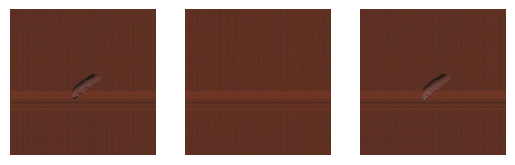

0.3676152527332306
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828710844581539_38_Passivation_Peeling/638010964116890281_RTEC_Regular_DEF.JPG


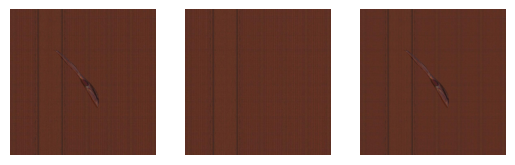

0.3634774684906006
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637828710844581539_38_Passivation_Peeling/637828714868564602_RTEC_Regular_DEF.JPG


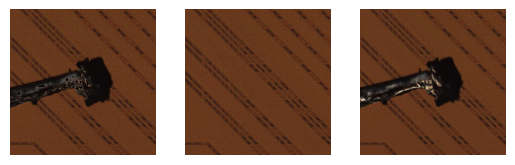

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637829364848213405_16_Metal_Residue/638010940993302097_RTEC_Regular_DEF.JPG  is error
OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637829364848213405_16_Metal_Residue/638010965853115807_RTEC_Regular_DEF.JPG  is error
OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637829364848213405_16_Metal_Residue/637829370958492182_RTEC_Regular_DEF.JPG  is error
OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/content/gdrive

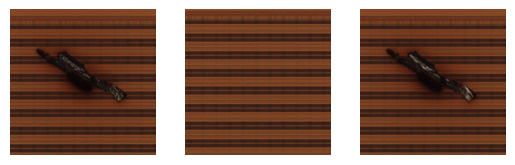

0.38655462861061096
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/638010972447455306_RTEC_Regular_DEF.JPG


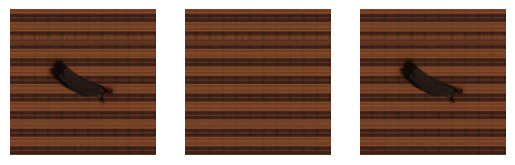

0.37004315853118896
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/638010972436677150_RTEC_Regular_DEF.JPG


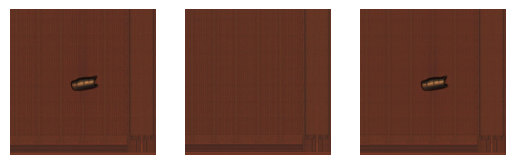

0.39516887068748474
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/638010972437301529_RTEC_Regular_DEF.JPG


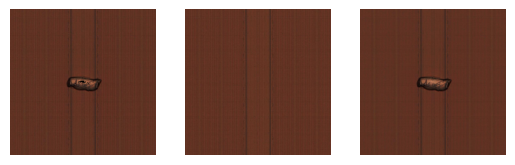

0.3845555782318115
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/638010972494940732_RTEC_Regular_DEF.JPG


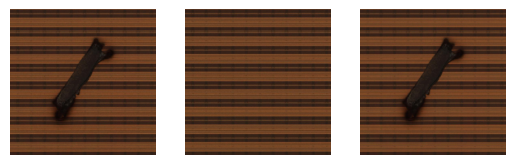

0.3652322292327881
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/637840782354465697_RTEC_Regular_DEF.JPG


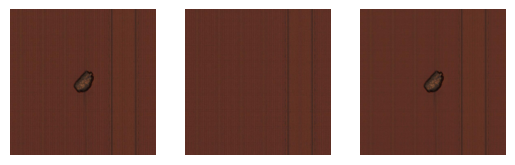

0.3383902311325073
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/638010972466355790_RTEC_Regular_DEF.JPG


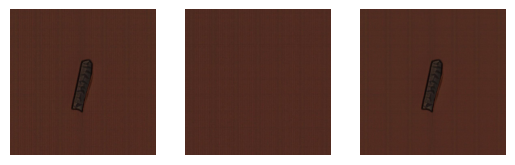

0.3791743218898773
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/637840782359312305_RTEC_Regular_DEF.JPG


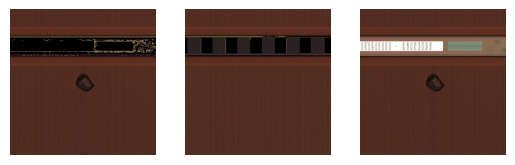

0.3867635130882263
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/638010972486505824_RTEC_Regular_DEF.JPG


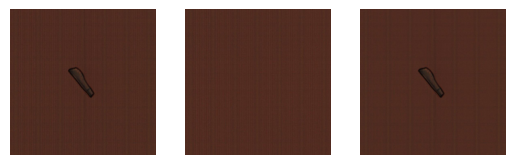

0.3473162353038788
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/638010972485412453_RTEC_Regular_DEF.JPG


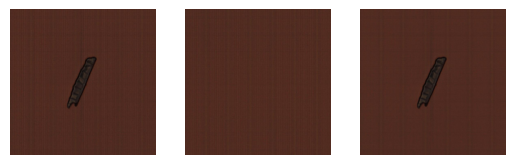

0.3694283068180084
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/637840782358374176_RTEC_Regular_DEF.JPG


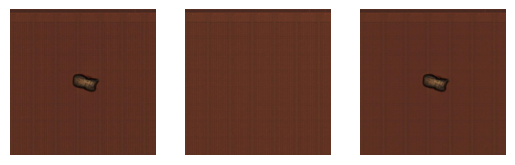

0.3173454701900482
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/638010972496346766_RTEC_Regular_DEF.JPG


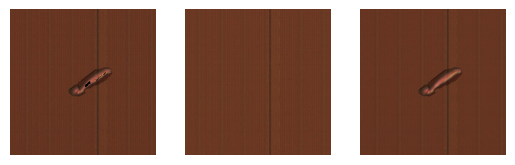

0.31259649991989136
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/637840782337268499_RTEC_Regular_DEF.JPG


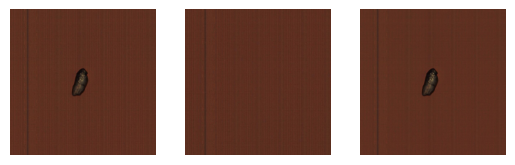

0.3032216429710388
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/638010972496971571_RTEC_Regular_DEF.JPG


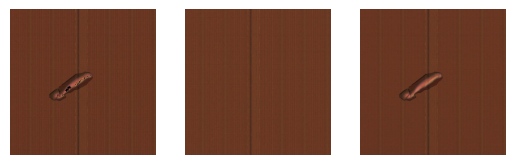

0.33032673597335815
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/638010972414184198_RTEC_Regular_DEF.JPG


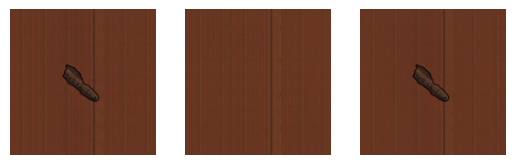

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/637840782369630624_RTEC_Regular_DEF.JPG  is error
0.38751837611198425
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/638010972430897603_RTEC_Regular_DEF.JPG


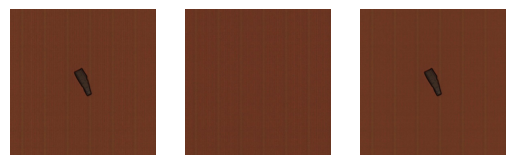

0.37801632285118103
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/638010972415746232_RTEC_Regular_DEF.JPG


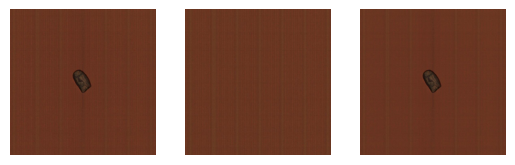

0.3916996419429779
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/637840782340707251_RTEC_Regular_DEF.JPG


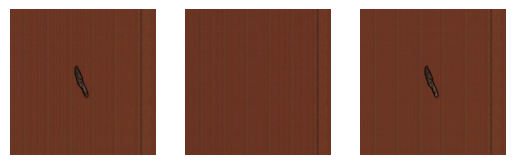

0.3879096508026123
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/637840782341333202_RTEC_Regular_DEF.JPG


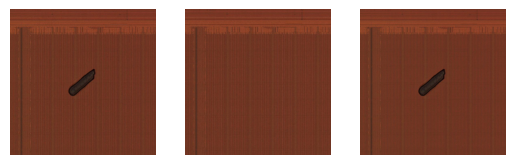

0.37588047981262207
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/637840782342114936_RTEC_Regular_DEF.JPG


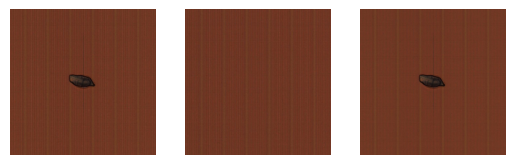

0.39629247784614563
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/637840782366190415_RTEC_Regular_DEF.JPG


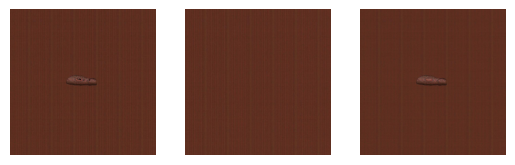

0.3919285833835602
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/637840782363689092_RTEC_Regular_DEF.JPG


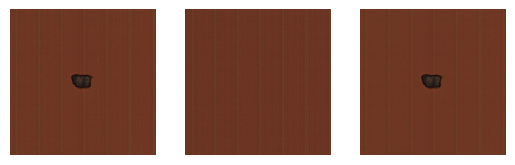

0.37087956070899963
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/638010972216744335_RTEC_Regular_DEF.JPG


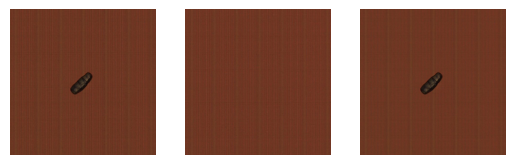

0.3748849928379059
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/638010972217212984_RTEC_Regular_DEF.JPG


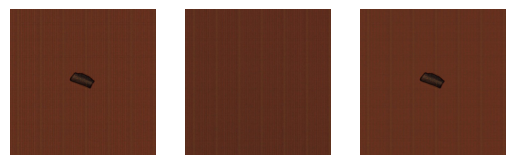

0.3501458466053009
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/638010972217681643_RTEC_Regular_DEF.JPG


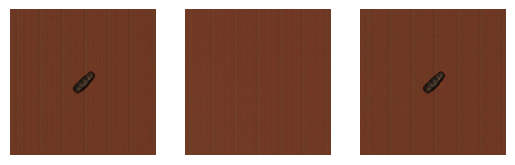

0.395168662071228
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/638010972401687886_RTEC_Regular_DEF.JPG


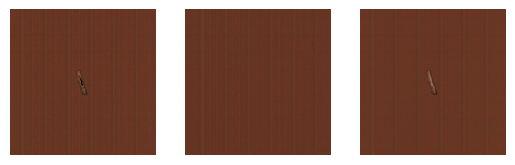

0.39861446619033813
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/637840782345710689_RTEC_Regular_DEF.JPG


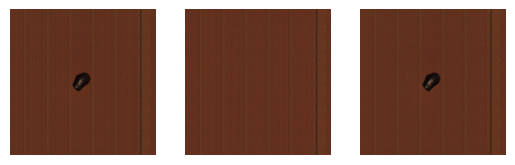

0.3767389953136444
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/637840782344616415_RTEC_Regular_DEF.JPG


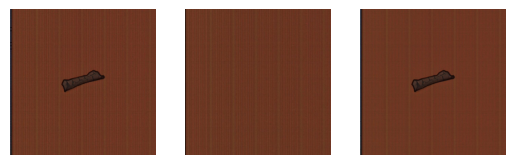

0.33097031712532043
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/637840782343991046_RTEC_Regular_DEF.JPG


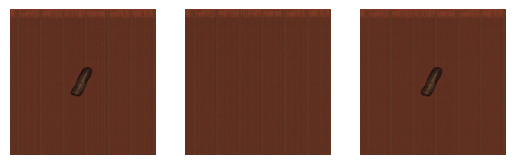

0.35557103157043457
/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840781965493807_61_Passivation_ LIF/638010972428554608_RTEC_Regular_DEF.JPG


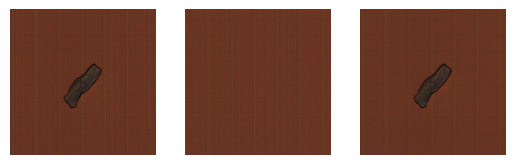

OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840782061485636_62_Passivation_ Laser marking/638010974053232190_RTEC_Regular_DEF.JPG  is error
OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840782061485636_62_Passivation_ Laser marking/638010972849839560_RTEC_Regular_DEF.JPG  is error
OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

/content/gdrive/Shareddrives/明志的日子/wafer/20221204/unzip/20221011_第三次/637840782061485636_62_Passivation_ Laser marking/637840783343471624_RTEC_Regular_DEF.JPG  is error
OpenCV(4.7.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty(

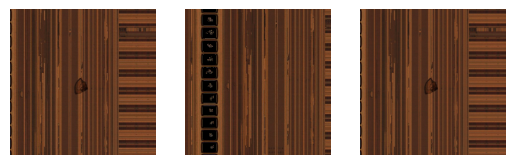

In [ ]:

test=[]
def load_images(path):
  images = []
  address=path
  
  for i in (address):
    # file_path = os.path.join(path, i)
    image = cv2.imread(i)
    image = cv2.resize(image, (224,224))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
  return address, images
co=0
for i in add_mask1[1700:]:
  co+=1
  try:
    lower = np.array([80,80,80])  # 轉換成 NumPy 陣列，範圍稍微變小 ( 55->30, 70->40, 252->200 )
    upper = np.array([255,255,255]) # 轉換成 NumPy 陣列，範圍稍微加大 ( 70->90, 80->100, 252->255 )


    REF=i.replace("DEF",'REF')
    DEF=i
    add,train=load_images([DEF,REF])
    img=cv2.cvtColor(train[0] ,cv2.COLOR_BGR2RGB)

    mask = cv2.inRange(img, lower, upper)             # 使用 inRange
    result_image = cv2.bitwise_and(img, img, mask = 255-mask )
    # plt.imshow(result_image)
    # plt.show()
    train[0]=result_image
    img=cv2.cvtColor(train[1] ,cv2.COLOR_BGR2RGB)
    # vectorized_img = img.reshape((-1,3))
    # vectorized_img= np.float32(vectorized_img)
    # criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    # K = 7
    # attempts=10
    # ret,label,center=cv2.kmeans(vectorized_img,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    # center = np.uint8(center)
    # res = center[label.flatten()]
    # result_image = res.reshape((img.shape))
    # result_image = cv2.cvtColor(result_image ,cv2.COLOR_BGR2RGB)
    mask = cv2.inRange(img, lower, upper)             # 使用 inRange
    result_image = cv2.bitwise_and(img, img, mask = 255-mask )
    # plt.imshow(result_image)
    # plt.show()
    train[1]=result_image
    
    train=normalise_images(train)
    # vgg19_output = covnet_transform(vgg19_model, train)  
    vgg19_output = covnet_transform(MobileNetV2_model, train)  
    
    cos_sim = 1 - spatial.distance.cosine(vgg19_output[0], vgg19_output[1])
    if cos_sim<0.4:
      print(cos_sim)
      print(i)
      test.append(i)
      img1=cv2.imread(DEF)
      img2=cv2.imread(REF)
      fig = plt.figure()
      plt.subplot(131)
      plt.imshow(train[0][:,:,::-1])
      plt.axis("off")
      plt.subplot(132)
      plt.imshow(train[1][:,:,::-1])
      plt.axis("off")
      
      plt.subplot(133)
      plt.imshow(img1[:,:,::-1])
      plt.axis("off")
      plt.show()
  except Exception as e:
    print(e)
    print(i ,' is error')
    

